In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [2]:
#load the data
(X_train,y_train),(X_test,y_test)  = cifar10.load_data()

#shape of dataset
print("X_train shape:",X_train.shape)
print("\nX_test shape:",X_test.shape)
print("\ny_train_shape:",y_train.shape)
print("\ny_test shape:",y_test.shape)

X_train shape: (50000, 32, 32, 3)

X_test shape: (10000, 32, 32, 3)

y_train_shape: (50000, 1)

y_test shape: (10000, 1)


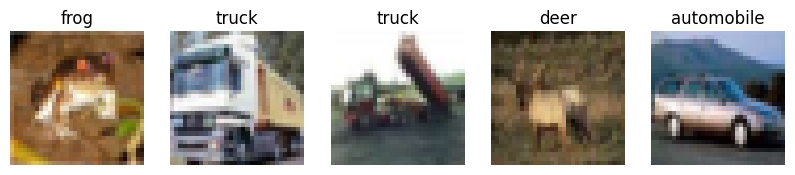

In [3]:
#DISPLAY 5 SAMPLE IMAGES AND LABELS
class_names  = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')
plt.show()

In [4]:
#unique labels and count
unique_labels,count = np.unique(y_train,return_counts=True)
print("Unique Lablels:",unique_labels)
print("Count:",count)

Unique Lablels: [0 1 2 3 4 5 6 7 8 9]
Count: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [5]:
#Normalize the image pixel values to the range [0, 1].
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [6]:
#covert labels to one_hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [7]:
#build a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
#train the model
history = model.fit(X_train,y_train,epochs=20,batch_size=64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.2437 - loss: 2.0045
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 90ms/step - accuracy: 0.4733 - loss: 1.4664
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5327 - loss: 1.3001
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.5712 - loss: 1.2079
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - accuracy: 0.5973 - loss: 1.1418
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.6199 - loss: 1.0882
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 95ms/step - accuracy: 0.6338 - loss: 1.0535
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 109ms/step - accuracy: 0.6468 - loss: 1.0251
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 96ms/step - accuracy: 0.6565 - loss: 0.9849
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.6635 - loss: 0.9591
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6699 - loss: 0.9406
Epoch 12/20
782/782 ━━━━━━

In [11]:
#evaluation on test_set
test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=2)
print(f"Test accuracy:,{test_accuracy:.4f}")

313/313 - 5s - 16ms/step - accuracy: 0.7533 - loss: 0.7180
Test accuracy:,0.7533


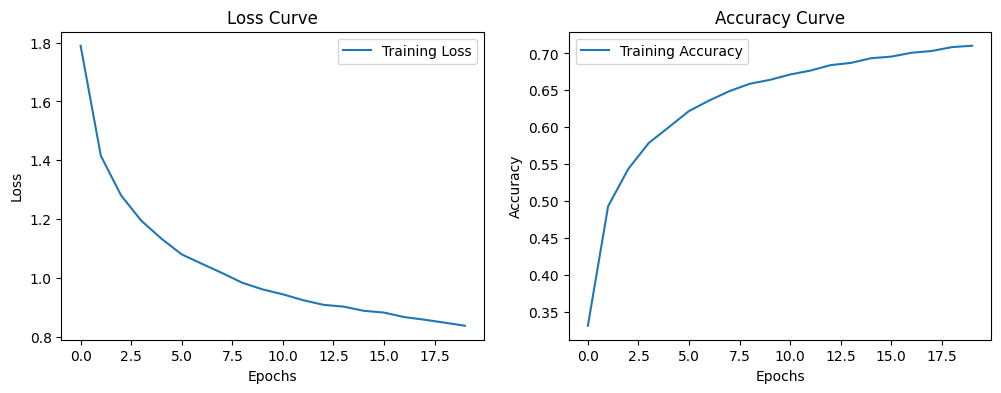

In [13]:
#loss plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
#predictions
y_pred=model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_test_classes = np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


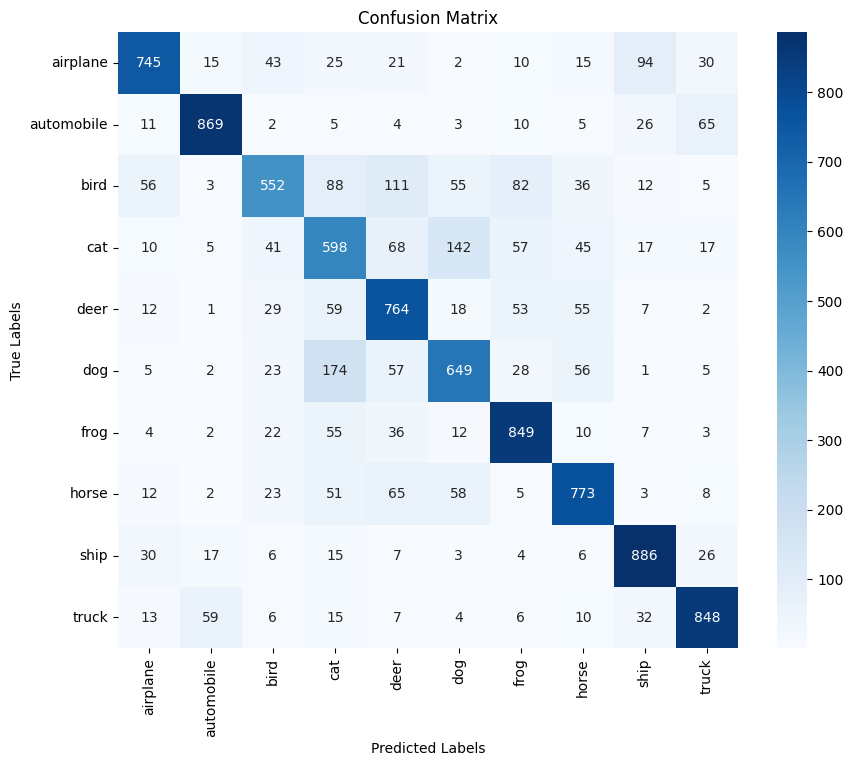

In [18]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

conf_matrix=confusion_matrix(y_test_classes,y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [19]:
#classification report
print(f"Classification Report:",classification_report(y_test_classes,y_pred_classes,target_names=class_names))

Classification Report:               precision    recall  f1-score   support

    airplane       0.83      0.74      0.79      1000
  automobile       0.89      0.87      0.88      1000
        bird       0.74      0.55      0.63      1000
         cat       0.55      0.60      0.57      1000
        deer       0.67      0.76      0.71      1000
         dog       0.69      0.65      0.67      1000
        frog       0.77      0.85      0.81      1000
       horse       0.76      0.77      0.77      1000
        ship       0.82      0.89      0.85      1000
       truck       0.84      0.85      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



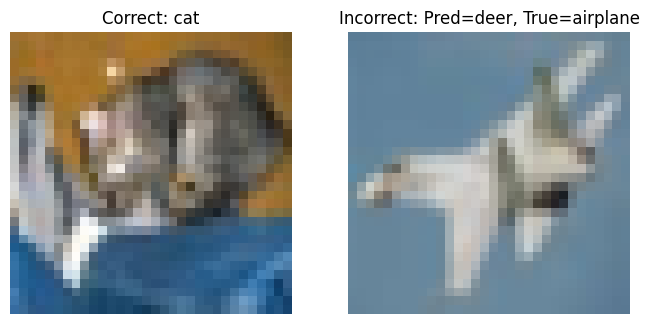

In [23]:
# Display examples of correct and incorrect predictions
correct_idx = np.where(y_pred_classes == y_test_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_test_classes)[0][0]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_test[correct_idx])
plt.title(f"Correct: {class_names[y_test_classes[correct_idx]]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_test[incorrect_idx])
plt.title(f"Incorrect: Pred={class_names[y_pred_classes[incorrect_idx]]}, True={class_names[y_test_classes[incorrect_idx]]}")
plt.axis('off')
plt.show()

In [25]:
model_improved = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model_improved.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 132ms/step - accuracy: 0.2370 - loss: 2.0333
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 91ms/step - accuracy: 0.4491 - loss: 1.5349
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.5175 - loss: 1.3601
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5623 - loss: 1.2529
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.5865 - loss: 1.1911
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.6054 - loss: 1.1313
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.6218 - loss: 1.0931
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6389 - loss: 1.0541
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.6427 - loss: 1.0377
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6511 - loss: 1.0231
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6593 - loss: 1.0065
Epoch 12/20
782/782 ━━━━━━━

In [31]:

# Evaluate the improved model
test_loss_improved, test_accuracy_improved = model_improved.evaluate(X_test, y_test, verbose=2)

# Performance comparison
print(f"\nadam Test Accuracy: {test_accuracy:.4f}")
print(f"\nrmsprop Test Accuracy: {test_accuracy_improved:.4f}")

313/313 - 5s - 15ms/step - accuracy: 0.7117 - loss: 0.9152

adam Test Accuracy: 0.7533

rmsprop Test Accuracy: 0.7117
